# Question 01

In [45]:
# Include all the necessary libraries

%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import pandas as pd


In [46]:
#import image as grayscale image and display it using openCV 

img = cv.imread("images/emma.jpg",cv.IMREAD_GRAYSCALE)
assert img is not None, 'Image not found'

cv.namedWindow("images",cv.WINDOW_AUTOSIZE)
cv.imshow("images",img)
cv.waitKey(0)
cv.destroyAllWindows()

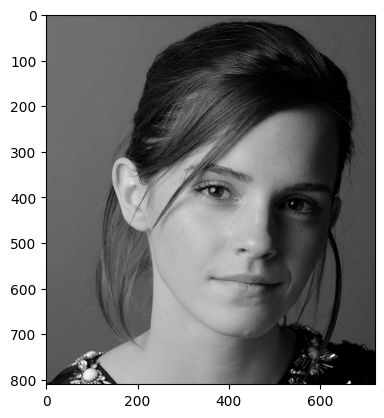

In [47]:
# Display using Matplotlib

fig,ax = plt.subplots()

ax.imshow(img,cmap="gray")
ax.set_title("")
plt.show()

In [48]:
# Display Image properties

print(img.shape)
print(img.size)
print(img.dtype)

(810, 720)
583200
uint8


51
100
105
256


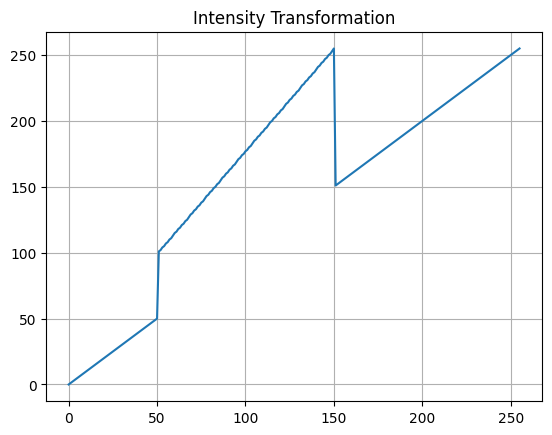

In [49]:
# Create Intensity Transformer

c= np.array([(50,50),(50,100),(150,255),(150,150)])
t1 = np.linspace(0,c[0,1],c[0,0]+1).astype("uint8")
print(len(t1))
t2 = np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype("uint8")
print(len(t2))
t3 = np.linspace(c[3,1]+1,255,255-c[3,0]).astype("uint8")
print(len(t3))

transform = np.concatenate((t1,t2),axis=0).astype("uint8")
transform = np.concatenate((transform,t3),axis=0).astype("uint8")

print(len(transform))

fig,ax = plt.subplots()
ax.plot(transform)
ax.set_title("Intensity Transformation")
ax.grid()
plt.show()

In [50]:
# Perform Transformation and visualize usinf opencv
transformed_image = cv.LUT(img,transform)
# Display Original Image
cv.namedWindow("Original image",cv.WINDOW_AUTOSIZE)
cv.imshow("Original image",img)
cv.waitKey(0)
# Display Transformed Image
cv.namedWindow("Transformed image",cv.WINDOW_AUTOSIZE)
cv.imshow("Transformed image",transformed_image)
cv.waitKey(0)
cv.destroyAllWindows()

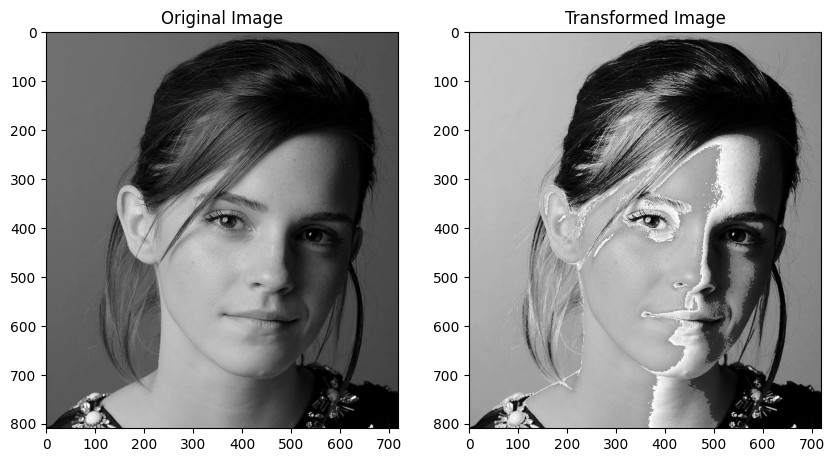

In [51]:
#visualize using matplotlib

fig,ax = plt.subplots(1,2,figsize=(10,8))

ax[0].imshow(img,cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(transformed_image,cmap="gray")
ax[1].set_title("Transformed Image")
plt.show()

# Question 02

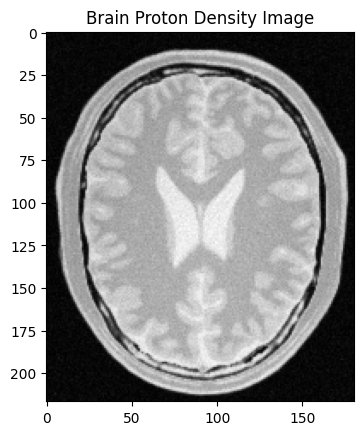

In [52]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# opening the image and visualizing using matplotlib

img = cv.imread("images/BrainProtonDensitySlice9.png",cv.IMREAD_GRAYSCALE)

# cv.namedWindow("images",cv.WINDOW_AUTOSIZE)
# cv.imshow("images",img)
# cv.waitKey(0)
# cv.destroyAllWindows()

fig,ax =plt.subplots()

ax.imshow(img,cmap="gray")
ax.set_title("Brain Proton Density Image")
plt.show()



51
130
75
256


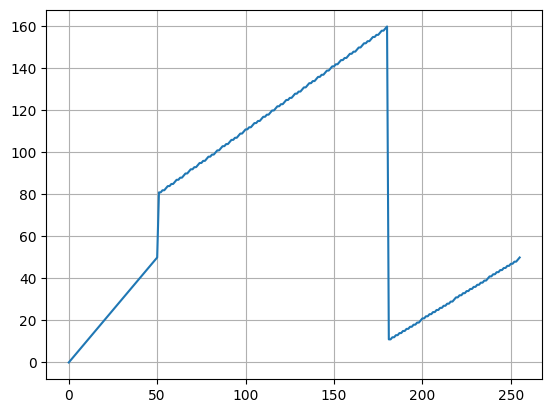

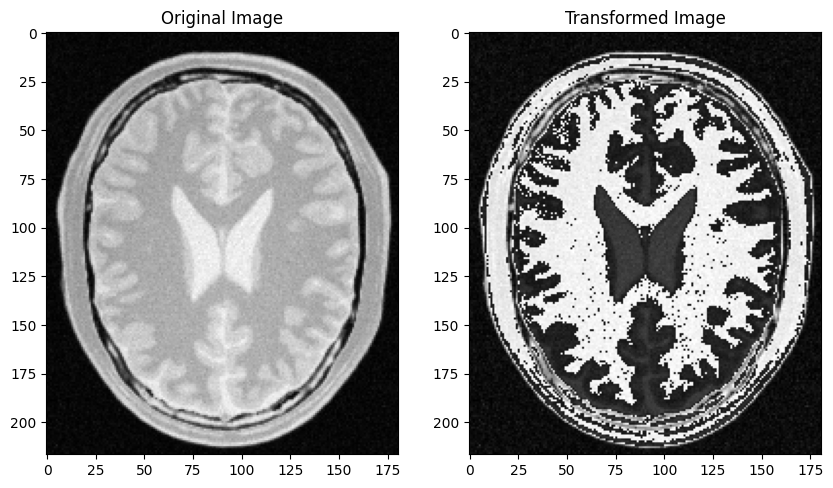

In [53]:
# Enhancing grey matte using intensiy transformations

c= np.array([(50,50),(50,80),(180,160),(180,10)])
t1 = np.linspace(0,c[0,1],c[0,0]+1).astype("uint8")
print(len(t1))
t2 = np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype("uint8")
print(len(t2))
t3 = np.linspace(c[3,1]+1,50,255-c[3,0]).astype("uint8")
print(len(t3))

transform = np.concatenate((t1,t2),axis=0).astype("uint8")
transform = np.concatenate((transform,t3),axis=0).astype("uint8")

print(len(transform))

fig,ax = plt.subplots()
ax.plot(transform)
ax.grid()
plt.show()

# # Perform Transformation and visualize usinf opencv
transformed_image = cv.LUT(img,transform)
# # Display Original Image
# cv.namedWindow("Original image",cv.WINDOW_AUTOSIZE)
# cv.imshow("Original image",transformed_image)
# cv.waitKey(0)
# cv.destroyAllWindows()

fig,ax = plt.subplots(1,2,figsize=(10,8))

ax[0].imshow(img,cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(transformed_image,cmap="gray")
ax[1].set_title("Transformed Image")

plt.show()






51
130
75
256


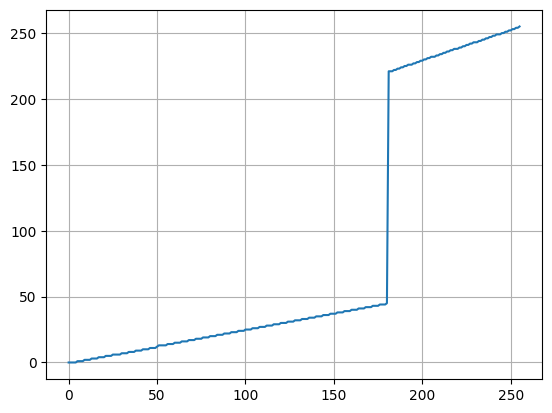

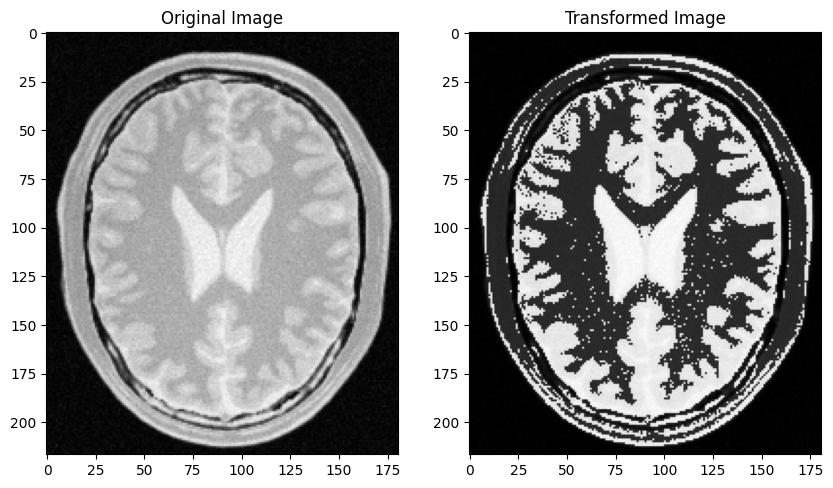

In [54]:
# Enhancing white matte using intensiy transformations

c= np.array([(50,12),(50,12),(180,45),(180,220)])
t1 = np.linspace(0,c[0,1],c[0,0]+1).astype("uint8")
print(len(t1))
t2 = np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype("uint8")
print(len(t2))
t3 = np.linspace(c[3,1]+1,255,255-c[3,0]).astype("uint8")
print(len(t3))

transform = np.concatenate((t1,t2),axis=0).astype("uint8")
transform = np.concatenate((transform,t3),axis=0).astype("uint8")

print(len(transform))

fig,ax = plt.subplots()
ax.plot(transform)
ax.grid()
plt.show()

# # Perform Transformation and visualize usinf opencv
transformed_image = cv.LUT(img,transform)
# # Display Original Image
# cv.namedWindow("Original image",cv.WINDOW_AUTOSIZE)
# cv.imshow("Original image",transformed_image)
# cv.waitKey(0)
# cv.destroyAllWindows()

fig,ax = plt.subplots(1,2,figsize=(10,8))

ax[0].imshow(img,cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(transformed_image,cmap="gray")
ax[1].set_title("Transformed Image")

plt.show()


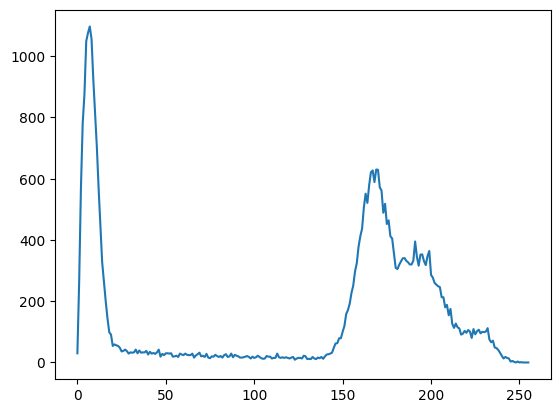

In [55]:
# Doing Histogram Equalization
# Visualizing the Histograms

hist = cv.calcHist([img],[0],None,[256],[0,256])

plt.plot(hist)

plt.show()

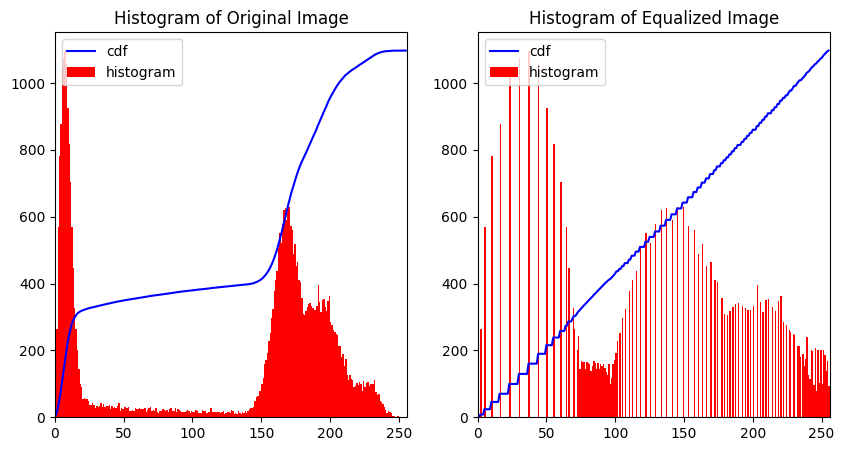

In [56]:
#Creating Histograms
hist,bins = np.histogram(img.ravel(),256,[0,256])
cdfa = hist.cumsum()
cdfa_normalized = cdfa * hist.max()/ cdfa.max()


# Histogram Equalization
equ = cv.equalizeHist(img)
hist,bins = np.histogram(equ.ravel(),256,[0,256])
cdfb = hist.cumsum()
cdfb_normalized = cdfb * hist.max()/ cdfb.max()

# Displaying the Histograms
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(cdfa_normalized, color = 'b')
ax[0].hist(img.flatten(),256,[0,256], color = 'r')
ax[0].set_xlim([0,256])
ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[0].set_title("Histogram of Original Image")

ax[1].plot(cdfb_normalized, color = 'b')
ax[1].hist(equ.flatten(),256,[0,256], color = 'r')
ax[1].set_xlim([0,256])
ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1].set_title("Histogram of Equalized Image")

plt.show()


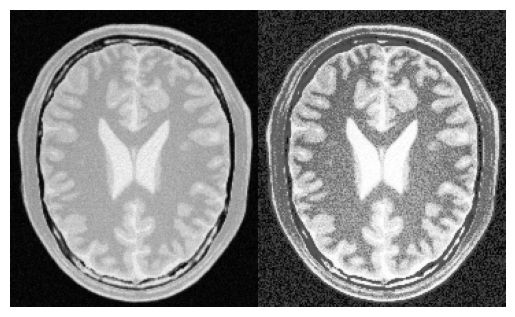

In [57]:

res=np.hstack((img,equ)) #stacking images side-by-side
plt.axis('off')
plt.imshow(res,cmap="gray")
plt.show()

# Question 03

Text(0.5, 1.0, 'Histogram of Equalized Image')

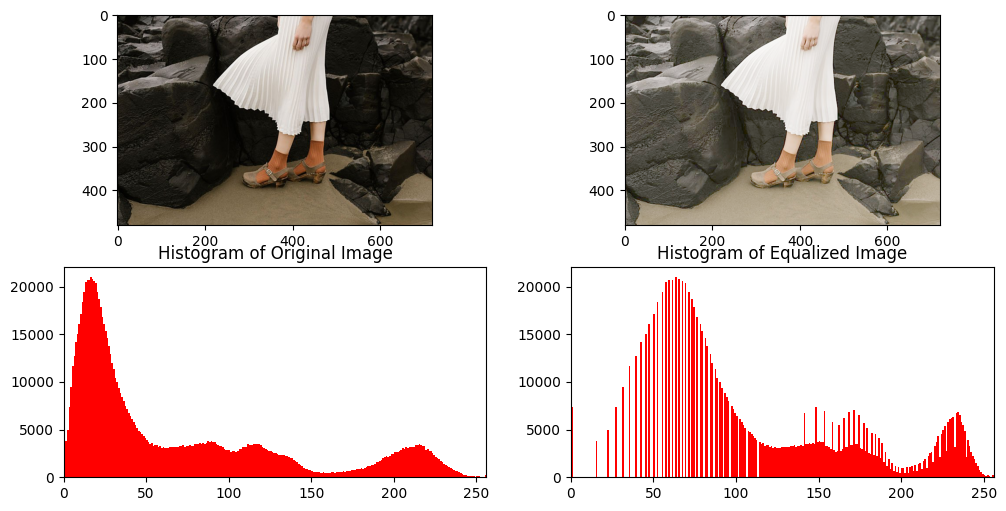

In [58]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread("images/highlights_and_shadows.jpg",cv.IMREAD_COLOR).astype('uint8')
gamma = 0.5
table = np.array([(i/255)**(gamma)*255 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(img_orig,table).astype('uint8')

img_orig = cv.cvtColor(img_orig,cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(img_gamma,cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(2,2,figsize=(12,6))

ax[0,0].imshow(img_orig)
ax[0,1].imshow(img_gamma)


ax[1,0].hist(img_orig.flatten(),256,[0,256], color = 'r')
ax[1,0].set_xlim([0,256])
# ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[1,0].set_title("Histogram of Original Image")

# ax[1].plot(cdfb_normalized, color = 'b')
ax[1,1].hist(img_gamma.flatten(),256,[0,256], color = 'r')
ax[1,1].set_xlim([0,256])
# ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1,1].set_title("Histogram of Equalized Image")

# ax[2,0].plot(table)
# ax[2,0].set_xlim(0,255)
# ax[2,0].set_ylim(0,255)
# ax[2,0].set_aspect('equal')

Text(0.5, 1.0, 'Histogram of Equalized Image')

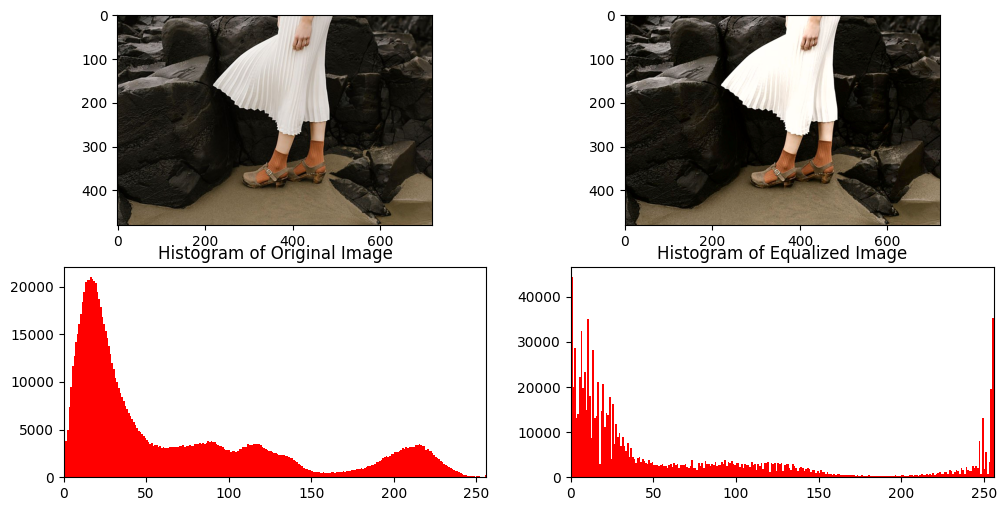

In [59]:
import cv2
import numpy as np

def apply_gamma_correction(image_lab, gamma):

    global L,L_corrected
    # Split the LAB image into L*, a*, and b* channels
    L, a, b = cv2.split(image_lab)

    # Apply gamma correction to the L* channel
    L_corrected = np.power(L / 100.0, gamma) * 100.0

    # Ensure the corrected L* channel is in the appropriate data range
    L_corrected = np.clip(L_corrected, 0, 255).astype('uint8')

    # Merge the corrected L* channel with the original a* and b* channels
    corrected_lab = cv2.merge([L_corrected, a, b])

    

    return corrected_lab

# Load the image in BGR color space
image_bgr = cv2.imread("images/highlights_and_shadows.jpg")

# Convert the image to LAB color space
image_lab = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2LAB)

# Set the desired gamma value (e.g., 2.2 for standard gamma correction)
gamma = 1.25

# Apply gamma correction to the LAB image
corrected_image_lab = apply_gamma_correction(image_lab, gamma)

# Convert the corrected LAB image back to BGR color space
corrected_image_bgr = cv2.cvtColor(corrected_image_lab, cv2.COLOR_LAB2BGR)

# Display and save the corrected image
# cv2.imshow('Original Image', image_bgr)
# cv2.imshow('Corrected Image', corrected_image_bgr)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

fig, ax = plt.subplots(2,2,figsize=(12,6))

ax[0,0].imshow(cv.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
ax[0,1].imshow(cv.cvtColor(corrected_image_bgr, cv2.COLOR_BGR2RGB))


ax[1,0].hist(image_bgr.flatten(),256,[0,256], color = 'r')
ax[1,0].set_xlim([0,256])
# ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[1,0].set_title("Histogram of Original Image")

# ax[1].plot(cdfb_normalized, color = 'b')
ax[1,1].hist(corrected_image_bgr.flatten(),256,[0,256], color = 'r')
ax[1,1].set_xlim([0,256])
# ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1,1].set_title("Histogram of Equalized Image")

# ax[2,0].plot(table)
# ax[2,0].set_xlim(0,255)
# ax[2,0].set_ylim(0,255)
# ax[2,0].set_aspect('equal')


# Save the corrected image
# cv2.imwrite('corrected_image.jpg', corrected_image_bgr)

# Qustion 04


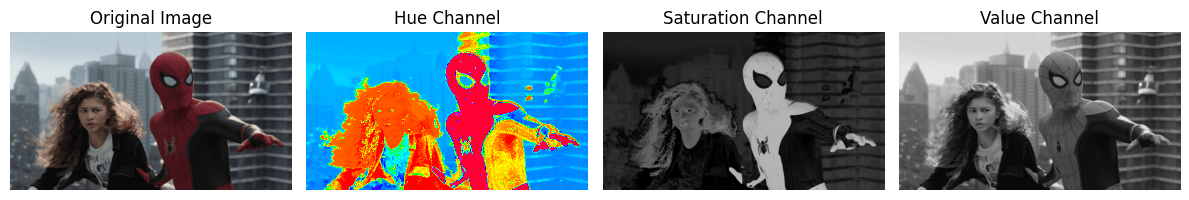

In [60]:
import cv2
import matplotlib.pyplot as plt

# Load the image in BGR color space
image_bgr = cv2.imread("images/spider.png")

# Convert the image to HSV color space
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# Split the HSV image into hue, saturation, and value channels
hue, saturation, value = cv2.split(image_hsv)

# Display the original BGR image and the HSV channels
fig, ax = plt.subplots(1, 4, figsize=(12, 4))

ax[0].imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')

ax[1].imshow(hue, cmap='hsv', vmin=0, vmax=180)
ax[1].set_title('Hue Channel')

ax[2].imshow(saturation, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Saturation Channel')

ax[3].imshow(value, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Value Channel')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


In [61]:
def satIntensityTransformer(x,alpha,zigma):
    
    transformer = x +(alpha*128)*np.exp((-(x-128)**2)/(2*(zigma**2)))
    # transformer = 1.5*x

    return min(transformer,255)

In [62]:
transformed_saturation= np.zeros(saturation.shape)

In [63]:
for i in range(len(saturation)):
    for j in range(len(saturation[i])):
        # print(transformed_saturation[i][j])
        transformed_saturation[i][j] = satIntensityTransformer(saturation[i][j],0.7,70)

In [64]:
transformed_saturation=transformed_saturation.astype('uint8')

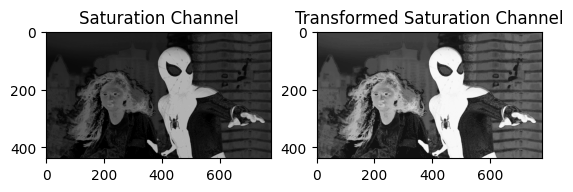

In [65]:
fig, ax = plt.subplots(1,2)

ax[0].imshow(saturation, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Saturation Channel')

ax[1].imshow(transformed_saturation, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Saturation Channel')

plt.show()

In [66]:
print(hue.dtype)
print(transformed_saturation.dtype)
print(value.dtype)
        

uint8
uint8
uint8


Text(0.5, 1.0, 'Histogram of Equalized Image')

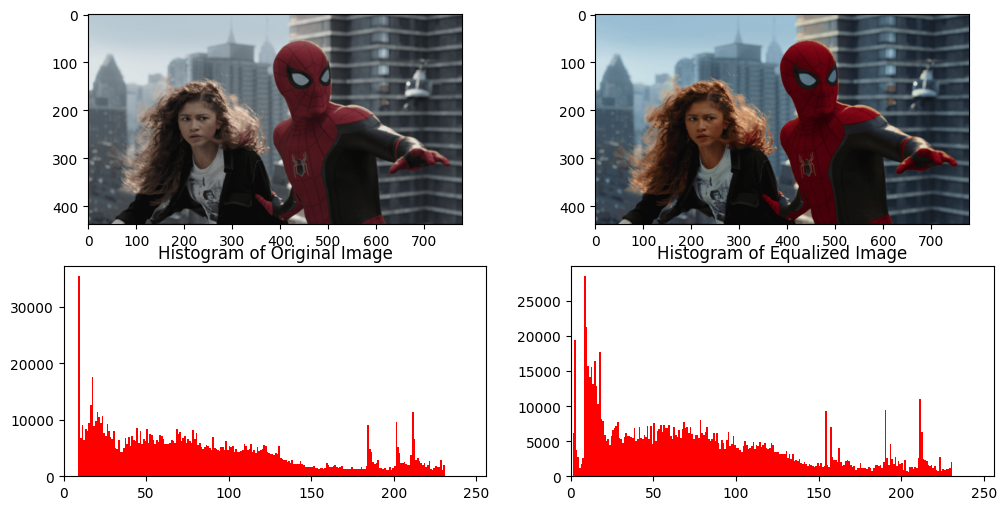

In [67]:
corrected_hsv = cv2.merge([hue, transformed_saturation, value])


corrected_image_hsv = cv2.cvtColor(corrected_hsv, cv2.COLOR_HSV2BGR)

# Display and save the corrected image
# cv2.imshow('Original Image', image_bgr)
# cv2.imshow('Corrected Image', corrected_image_bgr)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

fig, ax = plt.subplots(2,2,figsize=(12,6))

ax[0,0].imshow(cv.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
ax[0,1].imshow(cv.cvtColor(corrected_image_hsv, cv2.COLOR_BGR2RGB))


ax[1,0].hist(image_bgr.flatten(),256,[0,256], color = 'r')
ax[1,0].set_xlim([0,256])
# ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[1,0].set_title("Histogram of Original Image")

# ax[1].plot(cdfb_normalized, color = 'b')
ax[1,1].hist(corrected_image_hsv.flatten(),256,[0,256], color = 'r')
ax[1,1].set_xlim([0,256])
# ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1,1].set_title("Histogram of Equalized Image")

# Question 05

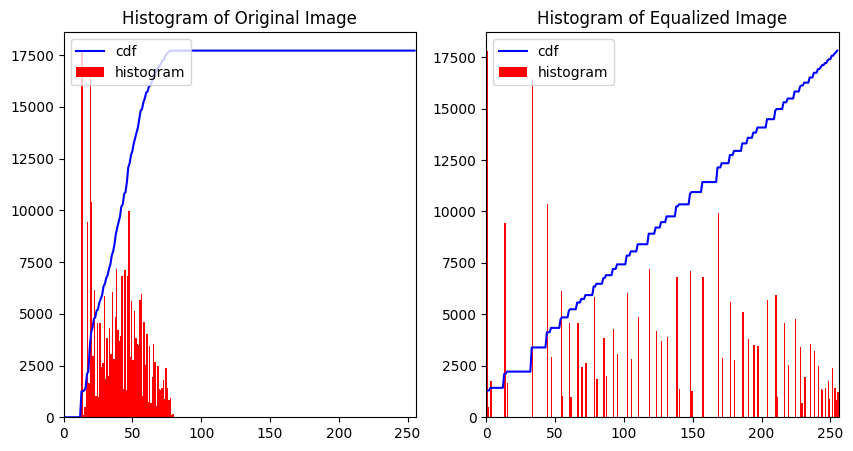

In [68]:
# importing libraries
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


img = cv.imread("images/shells.tif",cv.IMREAD_GRAYSCALE)


#Creating Histograms
hist,bins = np.histogram(img.ravel(),256,[0,256])
cdfa = hist.cumsum()
cdfa_normalized = cdfa * hist.max()/ cdfa.max()


# Histogram Equalization
equ = cv.equalizeHist(img)
hist,bins = np.histogram(equ.ravel(),256,[0,256])
cdfb = hist.cumsum()
cdfb_normalized = cdfb * hist.max()/ cdfb.max()

# Displaying the Histograms
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(cdfa_normalized, color = 'b')
ax[0].hist(img.flatten(),256,[0,256], color = 'r')
ax[0].set_xlim([0,256])
ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[0].set_title("Histogram of Original Image")

ax[1].plot(cdfb_normalized, color = 'b')
ax[1].hist(equ.flatten(),256,[0,256], color = 'r')
ax[1].set_xlim([0,256])
ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1].set_title("Histogram of Equalized Image")

plt.show()

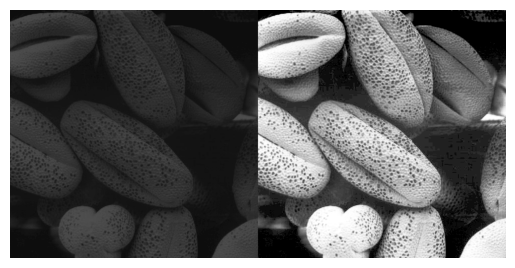

In [69]:
res=np.hstack((img,equ)) #stacking images side-by-side
plt.axis('off')
plt.imshow(res,cmap="gray")
plt.show()

# Quesion 06

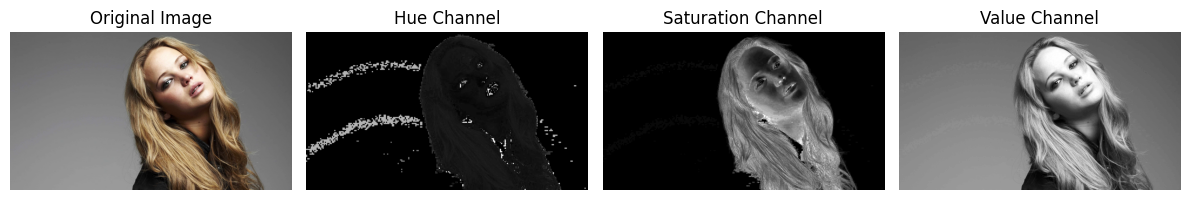

In [70]:
import cv2
import matplotlib.pyplot as plt

# Load the image in BGR color space
image_bgr = cv2.imread("images/jeniffer.jpg",cv.IMREAD_ANYCOLOR)

# Convert the image to HSV color space
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# Split the HSV image into hue, saturation, and value channels
hue, saturation, value = cv2.split(image_hsv)

# Display the original BGR image and the HSV channels
fig, ax = plt.subplots(1, 4, figsize=(12, 4))

ax[0].imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')

ax[1].imshow(hue, cmap='gray', vmin=0, vmax=180)
ax[1].set_title('Hue Channel')

ax[2].imshow(saturation, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Saturation Channel')

ax[3].imshow(value, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Value Channel')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


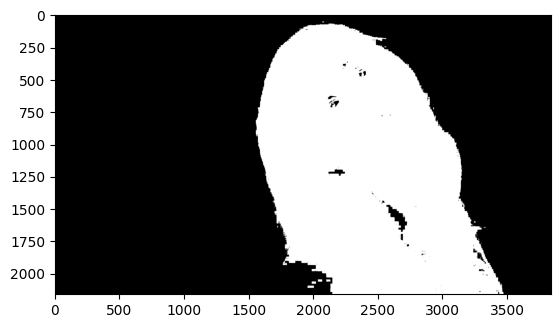

In [71]:
threshold_value = 15
_,foreground_mask = cv.threshold(saturation, threshold_value, 255, cv2.THRESH_BINARY)


# print(foreground_mask.shape)


fig,ax=plt.subplots()

ax.imshow(foreground_mask,cmap="gray")

# Display the foreground mask
# cv2.imshow('Foreground Mask', foreground_mask)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

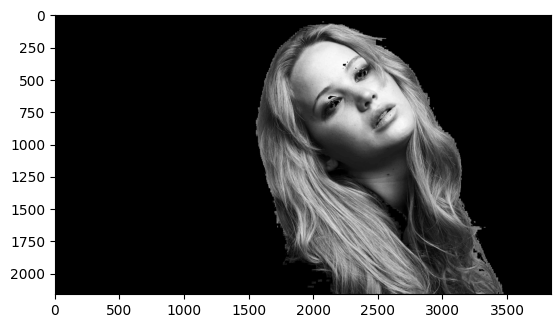

In [72]:
foreground = cv2.bitwise_and(image_bgr, image_bgr, mask=foreground_mask)

# Convert the foreground to grayscale for histogram calculation
foreground_gray = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)

fig,ax=plt.subplots()

ax.imshow(foreground_gray,cmap="gray")

plt.show()



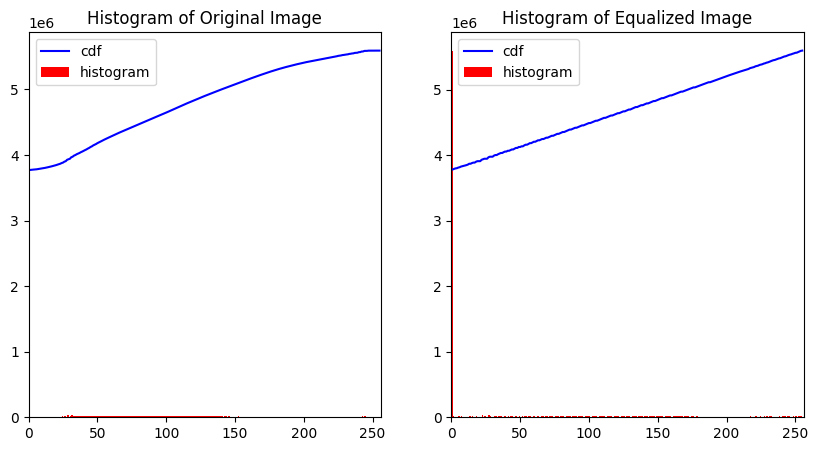

In [73]:
#Creating Histograms
hist,bins = np.histogram(foreground_gray.ravel(),256,[0,256])
cdfa = hist.cumsum()
cdfa_normalized = cdfa * hist.max()/ cdfa.max()


# Histogram Equalization
equ = cv.equalizeHist(foreground_gray)
hist,bins = np.histogram(equ.ravel(),256,[0,256])
cdfb = hist.cumsum()
cdfb_normalized = cdfb * hist.max()/ cdfb.max()

# Displaying the Histograms
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(cdfa_normalized, color = 'b')
ax[0].hist(foreground_gray.flatten(),256,[0,256], color = 'r')
ax[0].set_xlim([0,256])
ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[0].set_title("Histogram of Original Image")

ax[1].plot(cdfb_normalized, color = 'b')
ax[1].hist(equ.flatten(),256,[0,256], color = 'r')
ax[1].set_xlim([0,256])
ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1].set_title("Histogram of Equalized Image")

plt.show()

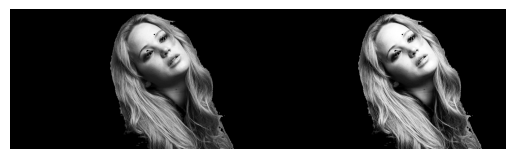

In [74]:
res=np.hstack((foreground_gray,equ)) #stacking images side-by-side
plt.axis('off')
plt.imshow(res,cmap="gray")
plt.show()

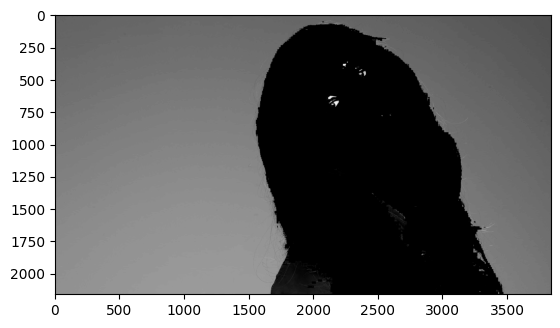

In [75]:
gray_image = cv.cvtColor(image_bgr,cv.COLOR_BGR2GRAY)
background_image = gray_image - foreground_gray


# print(foreground_mask.shape)


fig,ax=plt.subplots()

ax.imshow(background_image,cmap="gray")

Text(0.5, 1.0, 'Histogram of Equalized Image')

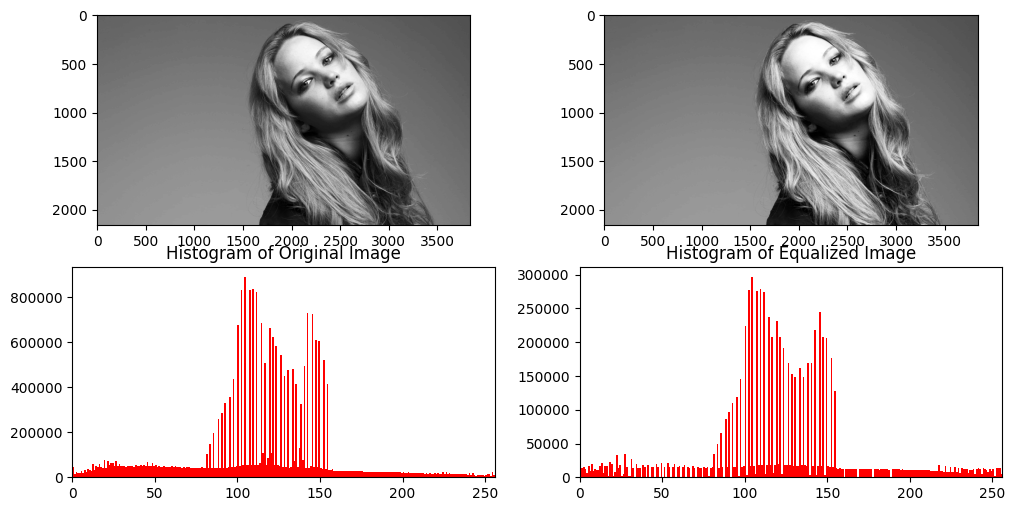

In [76]:
corrected_image = background_image + equ


# Display and save the corrected image
# cv2.imshow('Original Image', image_bgr)
# cv2.imshow('Corrected Image', corrected_image_bgr)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

fig, ax = plt.subplots(2,2,figsize=(12,6))

ax[0,0].imshow(cv.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY),cmap = "gray")
ax[0,1].imshow(corrected_image,cmap = "gray")


ax[1,0].hist(image_bgr.flatten(),256,[0,256], color = 'r')
ax[1,0].set_xlim([0,256])
# ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[1,0].set_title("Histogram of Original Image")

# ax[1].plot(cdfb_normalized, color = 'b')
ax[1,1].hist(corrected_image.flatten(),256,[0,256], color = 'r')
ax[1,1].set_xlim([0,256])
# ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1,1].set_title("Histogram of Equalized Image")

# Question 07

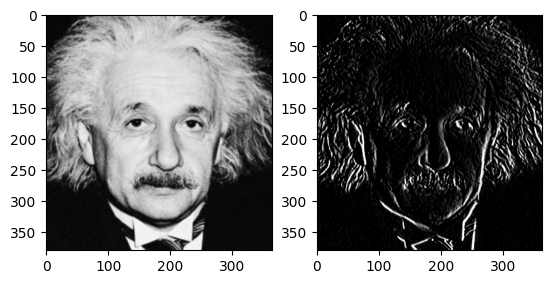

In [77]:
import cv2
import numpy as np
  
# Reading the image
image = cv2.imread('images/einstein.png')
  
# Creating the kernel(2d convolution matrix)
kernel1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
  
# Applying the filter2D() function
img = cv2.filter2D(image,-1,kernel1)
  
fig,ax = plt.subplots(1,2)

ax[0].imshow(image,cmap='gray')

ax[1].imshow(img,cmap='gray')

plt.show()

[[0 0 0 ... 0 0 0]
 [0 3 4 ... 4 1 0]
 [0 4 4 ... 4 2 0]
 ...
 [0 3 4 ... 2 1 0]
 [0 1 4 ... 6 3 0]
 [0 0 0 ... 0 0 0]]
255


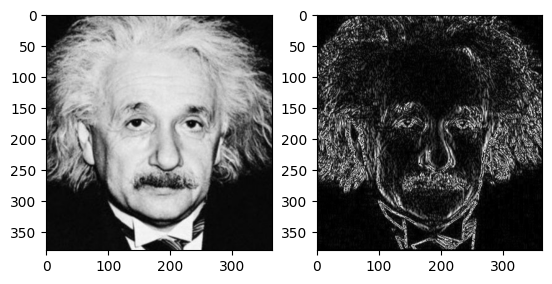

In [78]:
import cv2
import numpy as np

# Load the image in grayscale
image_gray = cv2.imread('images/einstein.png', cv2.IMREAD_GRAYSCALE)

# Sobel kernels
sobel_kernel_x = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])


# Convolution operation
gradient_x = np.zeros_like(image_gray, dtype=float)


for y in range(1, image_gray.shape[0] - 1):
    for x in range(1, image_gray.shape[1] - 1):
        window = image_gray[y-1:y+2, x-1:x+2]
        gradient_x[y, x] = np.sum(window * sobel_kernel_x)

# Compute gradient magnitude
gradient_magnitude = np.abs(gradient_x)
# gradient_magnitude = (gradient_magnitude / np.max(gradient_magnitude)) * 255 
gradient_magnitude = gradient_magnitude.astype(np.uint8)


print (gradient_magnitude)
print (np.max(gradient_magnitude))
# Display the result

fig,ax = plt.subplots(1,2)

ax[0].imshow(image_gray,cmap='gray')

ax[1].imshow(gradient_magnitude,cmap='gray')




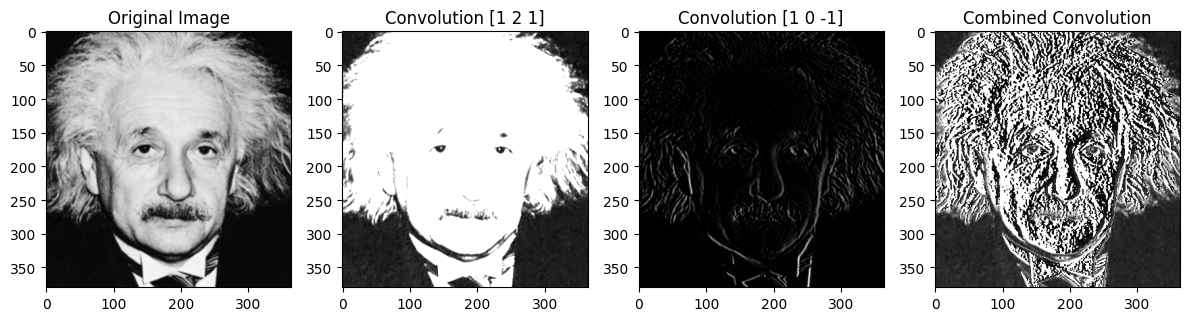

In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading the image
image = cv2.imread('images/einstein.png', cv2.IMREAD_GRAYSCALE)

# Defining the kernels
kernel1 = np.array([[1], [2], [1]])
kernel2 = np.array([[1, 0, -1]])

# Applying the convolutions
conv1 = cv2.filter2D(image, -1, kernel1)
conv2 = cv2.filter2D(image, -1, kernel2)

# Combining the convolution results
combined = conv1 + conv2

fig, ax = plt.subplots(1, 4, figsize=(12, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(conv1, cmap='gray')
ax[1].set_title('Convolution [1 2 1]')

ax[2].imshow(conv2, cmap='gray')
ax[2].set_title('Convolution [1 0 -1]')

ax[3].imshow(combined, cmap='gray')
ax[3].set_title('Combined Convolution')

plt.tight_layout()
plt.show()


In [80]:
# import math
# def filter(image,kernel):
#     assert kernel.shape[0]%2 == 1 and kernel.shape[1]%2 == 1, "Kernel must be odd sized"
#     k_hh,k_hw = math.floor(kernel.shape[0]/2),math.floor(kernel.shape[1]/2)
#     h,w = image.shape
#     image_float = cv.normalize(image.astype('float'),None,0.0,1.0,cv2.NORM_MINMAX)
#     result = np.zeros_like(image.shape,dtype='float')

#     for m in range (k_hh,h-k_hh):
#         for n in range (k_hw,w-k_hw):
#             result[m,n] = np.dot(image_float[m-k_hh:m+k_hh+1,n-k_hw:n+k_hw+1].flatten(),kernel.flatten())

#     return result

# # Load the image in grayscale

# image_gray = cv2.imread('images/einstein.png', cv2.IMREAD_GRAYSCALE)

# fig,ax = plt.subplots(1,2)

# ax[0].imshow(image_gray,cmap='gray')

# imgb = filter(image_gray,sobel_kernel_x)
# imgb = imgb*255
# imgb = imgb.astype('uint8')

# ax[1].imshow(imgb,cmap='gray')

# plt.show()


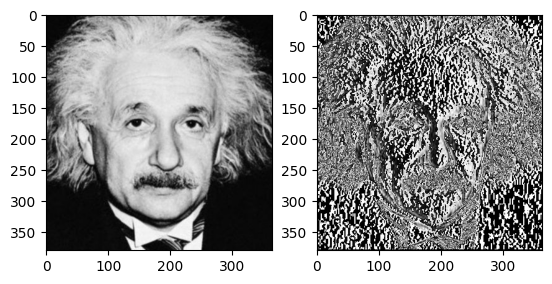

In [81]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

def filter(image, kernel):
    assert kernel.shape[0] % 2 == 1 and kernel.shape[1] % 2 == 1, "Kernel must be odd sized"
    k_hh, k_hw = math.floor(kernel.shape[0] / 2), math.floor(kernel.shape[1] / 2)
    h, w = image.shape
    image_float = cv2.normalize(image.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
    result = np.zeros_like(image, dtype='float')

    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):
            result[m, n] = np.dot(image_float[m - k_hh:m + k_hh + 1, n - k_hw:n + k_hw + 1].flatten(),
                                   kernel.flatten())

    return result

# Sobel kernel for horizontal edges
sobel_kernel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

# Load the image in grayscale
image_gray = cv2.imread('images/einstein.png', cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 2)

ax[0].imshow(image_gray, cmap='gray')

imgb = filter(image_gray, sobel_kernel_x)
imgb = imgb * 255
imgb = imgb.astype('uint8')

ax[1].imshow(imgb, cmap='gray')

plt.show()


In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def zoom_nearest_neighbor(image, factor):
    h, w, _ = image.shape
    new_h = int(h * factor)
    new_w = int(w * factor)
    zoomed_image = np.zeros((new_h, new_w, 3), dtype=np.uint8)
    
    for i in range(new_h):
        for j in range(new_w):
            orig_i = int(i / factor)
            orig_j = int(j / factor)
            zoomed_image[i, j] = image[orig_i, orig_j]
    
    return zoomed_image

# def zoom_bilinear(image, factor):
#     h, w, _ = image.shape
#     new_h = int(h * factor)
#     new_w = int(w * factor)
#     zoomed_image = np.zeros((new_h, new_w, 3), dtype=np.uint8)
    
#     for i in range(new_h):
#         for j in range(new_w):
#             orig_i = i / factor
#             orig_j = j / factor
            
#             i1, i2 = int(np.floor(orig_i)), int(np.ceil(orig_i))
#             j1, j2 = int(np.floor(orig_j)), int(np.ceil(orig_j))
            
#             # Bilinear interpolation
#             value = (1 - (orig_i - i1)) * (1 - (orig_j - j1)) * image[i1, j1] + \
#                     (1 - (orig_i - i1)) * (orig_j - j1) * image[i1, j2] + \
#                     (orig_i - i1) * (1 - (orig_j - j1)) * image[i2, j1] + \
#                     (orig_i - i1) * (orig_j - j1) * image[i2, j2]
            
#             zoomed_image[i, j] = value.astype(np.uint8)
    
#     return zoomed_image


def zoom_bilinear(image, factor):
    h, w, _ = image.shape
    new_h = int(h * factor)
    new_w = int(w * factor)
    zoomed_image = np.zeros((new_h, new_w, 3), dtype=np.uint8)
    
    for i in range(new_h):
        for j in range(new_w):
            orig_i = i / factor
            orig_j = j / factor
            
            i1, i2 = int(np.floor(orig_i)), int(np.ceil(orig_i))
            j1, j2 = int(np.floor(orig_j)), int(np.ceil(orig_j))
            
            i1 = max(0, min(i1, h - 1))  # Ensure indices stay within image boundaries
            i2 = max(0, min(i2, h - 1))
            j1 = max(0, min(j1, w - 1))
            j2 = max(0, min(j2, w - 1))
            
            # Bilinear interpolation
            value = (1 - (orig_i - i1)) * (1 - (orig_j - j1)) * image[i1, j1] + \
                    (1 - (orig_i - i1)) * (orig_j - j1) * image[i1, j2] + \
                    (orig_i - i1) * (1 - (orig_j - j1)) * image[i2, j1] + \
                    (orig_i - i1) * (orig_j - j1) * image[i2, j2]
            
            zoomed_image[i, j] = value.astype(np.uint8)
    
    return zoomed_image

# Load an image
image_path = 'images/zooming/im01small.png'
original_image = cv2.imread(image_path)

# Zoom factor
zoom_factor = 2  # Change this to the desired zoom factor

# Zoom using nearest-neighbor
zoomed_nn = zoom_nearest_neighbor(original_image, zoom_factor)

# Zoom using bilinear interpolation
zoomed_bilinear = zoom_bilinear(original_image, zoom_factor)

# Display the results
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 3, 1)
# plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
# plt.title('Original Image')

# plt.subplot(1, 3, 2)
# plt.imshow(cv2.cvtColor(zoomed_nn, cv2.COLOR_BGR2RGB))
# plt.title('Zoomed (Nearest Neighbor)')

# # plt.subplot(1, 3, 3)
# # plt.imshow(cv2.cvtColor(zoomed_bilinear, cv2.COLOR_BGR2RGB))
# # plt.title('Zoomed (Bilinear Interpolation)')

# plt.tight_layout()
# plt.show()

cv2.namedWindow('Original Image', cv2.WINDOW_AUTOSIZE)
cv2.namedWindow('Zoomed (Nearest Neighbor)', cv2.WINDOW_AUTOSIZE)
cv2.namedWindow('Zoomed (Bilinear Interpolation)', cv2.WINDOW_AUTOSIZE)

cv2.imshow('Original Image', original_image)
cv2.imshow('Zoomed (Nearest Neighbor)', zoomed_nn)
cv2.imshow('Zoomed (Bilinear Interpolation)', zoomed_bilinear)

cv2.waitKey(0)
cv2.destroyAllWindows()



In [83]:
small_image = cv2.imread('images/zooming/im01small.png')
original_image = cv2.imread('images/zooming/im01.png')

# Zoom factor
scale_factor = 4.0

scale_factor = 4.0
scaled_nn = zoom_nearest_neighbor(small_image, scale_factor)
scaled_bilinear = zoom_bilinear(small_image, scale_factor)

ssd_nn = np.sum((scaled_nn - original_image)**2)
ssd_bilinear = np.sum((scaled_bilinear - original_image)**2)

# Normalize the SSD values
normalized_ssd_nn = ssd_nn / (original_image.shape[0] * original_image.shape[1])
normalized_ssd_bilinear = ssd_bilinear / (original_image.shape[0] * original_image.shape[1])

# Print the normalized SSD values
print(f"Normalized SSD (Nearest Neighbor): {normalized_ssd_nn}")
print(f"Normalized SSD (Bilinear Interpolation): {normalized_ssd_bilinear}")

Normalized SSD (Nearest Neighbor): 93.85294945987654
Normalized SSD (Bilinear Interpolation): 117.77109953703703


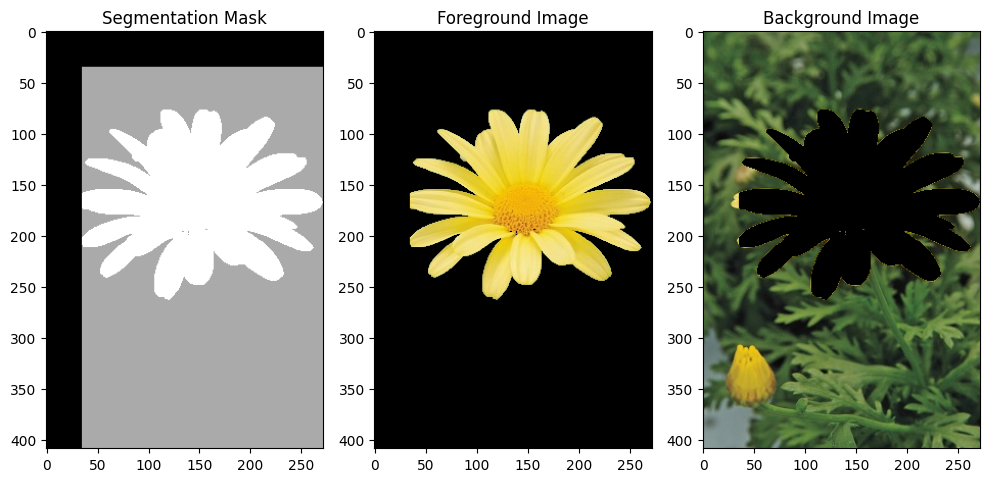

In [98]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('images/flower.jpg')
image = cv2.cvtColor(image,cv.COLOR_BGR2RGB)
# Initialize the mask (1s for sure foreground, 0s for sure background)
mask = np.zeros(image.shape[:2], np.uint8)

# Define the rectangular region of interest for initial segmentation
rect = (35, 35, image.shape[1] - 25, image.shape[0] - 25)

# Apply grabCut algorithm
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask to create a binary foreground mask
foreground_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Extract foreground and background images
foreground_image = image * foreground_mask[:, :, np.newaxis]
background_image = image * (1 - foreground_mask[:, :, np.newaxis])

# Display the segmentation results
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(mask, cmap='gray')
plt.title('Segmentation Mask')

plt.subplot(132)
plt.imshow(foreground_image)
plt.title('Foreground Image')

plt.subplot(133)
plt.imshow(background_image)
plt.title('Background Image')

plt.tight_layout()
plt.show()


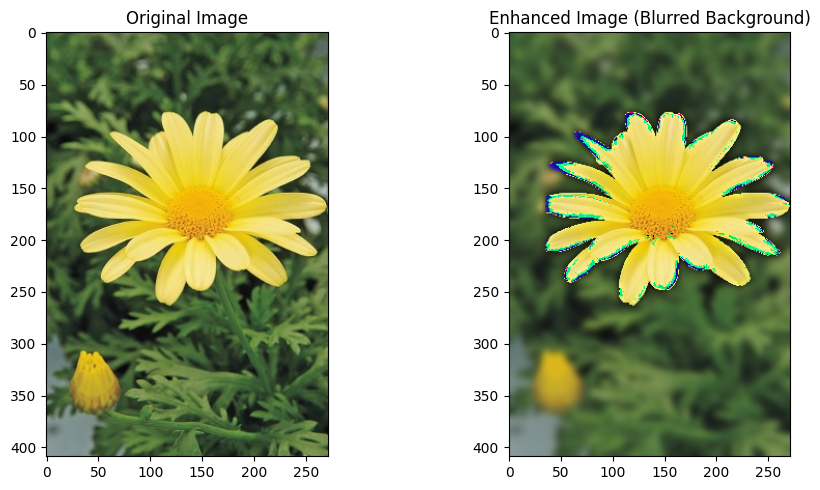

In [102]:
# Apply Gaussian blur to the background image
blurred_background = cv2.GaussianBlur(background_image, (21, 21), 0)


# add blurred background and foreground images
final_image = foreground_image + blurred_background

# final_image = cv.cvtColor(final_image,cv.COLOR_BGR2RGB)

image = cv2.cvtColor(image,cv.COLOR_BGR2RGB)



# Display the original and enhanced images
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(122)
plt.imshow(final_image)
plt.title('Enhanced Image (Blurred Background)')

plt.tight_layout()
plt.show()
